In [46]:
import joblib as joblib
import pandas as pd
import numpy as np
import seaborn as sns


In [47]:
df = pd.read_csv("/Users/ernazerkinbekov/Desktop/course_project_ML/Text Emotion Detection/data/emotion_dataset_raw.csv")

In [48]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [49]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

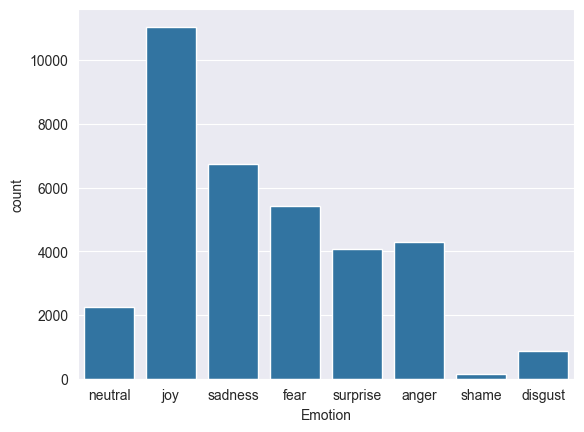

In [50]:
sns.countplot(x='Emotion',data=df)

### Data pre-processing

In [51]:
import neattext.functions as nfx

# Remove the user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [52]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [53]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [54]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [55]:
x = df['Clean_Text']
y = df['Emotion']

In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Training the model

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [58]:
pipe_lr = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr', LogisticRegression(max_iter=1000))])
pipe_svm = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])
pipe_rf = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])


In [59]:
param_grid_lr = {
    'tfidf__max_features': [1000, 3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'lr__C': [0.1, 1, 10]
}

In [60]:
param_grid_svm = {
    'tfidf__max_features': [1000, 3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

In [61]:
param_grid_rf = {
    'tfidf__max_features': [1000, 3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20]
}

In [62]:
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(x_train, y_train)
best_lr = grid_lr.best_estimator_
lr_accuracy = accuracy_score(y_test, best_lr.predict(x_test))
print("Logistic Regression - Best Parameters:", grid_lr.best_params_)
print("Logistic Regression - Accuracy:", lr_accuracy)


Logistic Regression - Best Parameters: {'lr__C': 10, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
Logistic Regression - Accuracy: 0.6102888346026728


In [63]:
grid_svm = GridSearchCV(pipe_svm, param_grid=param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(x_train, y_train)
best_svm = grid_svm.best_estimator_
svm_accuracy = accuracy_score(y_test, best_svm.predict(x_test))
print("SVM - Best Parameters:", grid_svm.best_params_)
print("SVM - Accuracy:", svm_accuracy)

SVM - Best Parameters: {'svc__C': 10, 'svc__kernel': 'rbf', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
SVM - Accuracy: 0.6450639459692484


In [64]:
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(x_train, y_train)
best_rf = grid_rf.best_estimator_
rf_accuracy = accuracy_score(y_test, best_rf.predict(x_test))
print("Random Forest - Best Parameters:", grid_rf.best_params_)
print("Random Forest - Accuracy:", rf_accuracy)

/Users/ernazerkinbekov/Desktop/course_project_ML/venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest - Best Parameters: {'rf__max_depth': None, 'rf__n_estimators': 200, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
Random Forest - Accuracy: 0.6207788475355654


In [71]:
num_rows = df.shape[0]
print("Количество строк в датасете:", num_rows)

Количество строк в датасете: 34792
